In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as scp

In [7]:
import seaborn as sns

# k-mers generation

In [3]:
olga_trb = pd.read_csv('/home/dluppov/TRB_10_7.tsv', sep = '\t', header = None)
olga_trb.rename(columns = {0: 'seq', 1: 'aa', 2: 'V_gene', 3: 'J_gene'}, inplace = True)
keck_raw = pd.read_csv('/home/dluppov/tcr-thymic-selection/naive_cells/hip_full/naive_clonotypes_keck.csv.gz')

#фильтр неканонических посследовательностей
keck_raw = keck_raw.loc[np.logical_and(keck_raw.cdr3aa.str.startswith('C'), 
               np.logical_or(keck_raw.cdr3aa.str.endswith('W'),
                             keck_raw.cdr3aa.str.endswith('F')))]

KeyboardInterrupt: 

In [ ]:
from itertools import islice
import tqdm
 
def over_slice(test_str, k=4):
    itr = iter(test_str)
    res = tuple(islice(itr, k))
    if len(res) == k:
        yield res   
    for ele in itr:
        res = res[1:] + (ele,)
        yield res

        
def k_mers_list_generatot(seq, k=4):
    res = ["".join(ele) for ele in over_slice(seq, k)]
    return res

In [5]:
res = keck_raw.cdr3aa.apply(lambda x: np.array(k_mers_list_generatot(x, k=3)))
res_list = np.concatenate(np.array(res))
kmer_freq = pd.Series(res_list).value_counts()
pd.Series(kmer_freq).to_csv('./Sample_k3mers_counts.csv')


# k-mer analysis

In [11]:
#присвоим каждой последовательности хэш, такой, что он будет одинаковым у палиндромов
def palindrome_hash(kmer):
    kmer_hash = hash(kmer) + hash(kmer[::-1]) 
    return kmer_hash

In [12]:
keck_kmers = pd.read_csv('/home/dluppov/Sample_kmers_counts.csv', index_col=0)
keck_kmers

0
CASS  603959
TQYF  171754
EQYF  143523
ASSL  137861
EQFF  132964
...      ...
EMAH       1
HMEF       1
IGHV       1
ELYW       1
CYKL       1

[114003 rows x 1 columns]

In [13]:
hashes = pd.Series(keck_kmers.index).apply(lambda x: palindrome_hash(x))#.value_counts()
hashes

0         10308608701847793632
1         11642345971844127960
2          3314839082141439768
3          4525694808602283316
4          2652254469456641272
                  ...         
113998     2964083913677238241
113999    -3839723281295212668
114000      -98845647645669187
114001     2612091170437468639
114002     7063339640627327108
Length: 114003, dtype: object

In [14]:
hashes.value_counts()

10308608701847793632     2
-7163616406499701028     2
-4679717294229899051     2
1308244708804075304      2
-9352814048690871499     2
                        ..
-13572954993351792787    1
3812114438213042366      1
-884698892766853037      1
-8140887143200249039     1
7063339640627327108      1
Length: 65175, dtype: int64

In [15]:
hashes.index = keck_kmers.index

In [16]:
keck_kmers.insert(1, 'hash', hashes)
keck_kmers

0                  hash
CASS  603959  10308608701847793632
TQYF  171754  11642345971844127960
EQYF  143523   3314839082141439768
ASSL  137861   4525694808602283316
EQFF  132964   2652254469456641272
...      ...                   ...
EMAH       1   2964083913677238241
HMEF       1  -3839723281295212668
IGHV       1    -98845647645669187
ELYW       1   2612091170437468639
CYKL       1   7063339640627327108

[114003 rows x 2 columns]

In [17]:
keck_kmers_summed = keck_kmers.groupby('hash').sum()
keck_kmers_summed

0
hash                      
-18368248475032465510  725
-18340786131244484616    1
-18297237384540770016   18
-18238765403121157298   70
-18238531397791473104    3
...                    ...
18223174336758102792     8
18292873142327868222   359
18297998958454671511     3
18300552758733805436    19
18439894662437165014    64

[65175 rows x 1 columns]

In [18]:
hases_dict = hashes.to_dict()
hases_dict = dict(zip(hases_dict.values(), hases_dict.keys()))
hases_dict

{10308608701847793632: 'SSAC',
 11642345971844127960: 'FYQT',
 3314839082141439768: 'FYQE',
 4525694808602283316: 'LSSA',
 2652254469456641272: 'FFQE',
 -7688138308599109470: 'FTYG',
 -8067903436065717461: 'FFAE',
 -9779525221896674192: 'FQEN',
 5268268340100716908: 'YQEY',
 -11621640479105274460: 'YQTD',
 -3616597742415660277: 'FAET',
 2410930246274659024: 'PSSA',
 -4396529217509371851: 'YQTE',
 6507544600826720778: 'QSSA',
 3142690947710333625: 'TYGY',
 2331937911644822784: 'FHQP',
 -8312815728118600549: 'FFLE',
 5553240137422792545: 'FLEG',
 -7885018720019280939: 'HQPQ',
 2014501681556525725: 'QENY',
 13282847740952415368: 'QTDT',
 3496003302684053909: 'CASR',
 -10410956109349781567: 'SSSA',
 2292410141889563148: 'LEGT',
 5765689024766018937: 'FFLK',
 176589823722199100: 'CSAR',
 6279819514813245947: 'AETN',
 9180382369415127967: 'FLKE',
 15723326014793274914: 'QPQN',
 -6125139131963407: 'YSSA',
 9142029245961524345: 'FSSA',
 10351364557132083052: 'TIYF',
 -400362346031893328: 'QEYS

In [19]:
keck_kmers_summed.index = pd.Series(keck_kmers_summed.index).apply(lambda x: hases_dict[x])
keck_kmers_summed

0
hash     
GTTG  725
HPLM    1
ITKS   18
EQVQ   70
QKKQ    3
...   ...
DVVD    8
ENDL  359
LQIM    3
DAAD   19
DTTD   64

[65175 rows x 1 columns]

In [20]:
keck_kmers_summed.to_csv('/home/dluppov/Sample_kmers_counts_mirror_sum.csv')

In [21]:
(keck_kmers_summed["0"]).sort_values(ascending=False)

hash
SSAC    603960
FYQT    171758
FYQE    143551
LSSA    137966
FFQE    132979
         ...  
WWIF         1
WKGC         1
LMHK         1
CVVV         1
WNQI         1
Name: 0, Length: 65175, dtype: int64

# Analysis

In [8]:
keck_kmers = pd.read_csv('/home/dluppov/Sample_k3mers_counts.csv', index_col=0)
olga_kmers = pd.read_csv('/home/dluppov/Olga_k3mers_counts.csv', index_col=0)
# keck_kmers = pd.read_csv('./Sample_kmers_counts.csv', index_col=0)
# olga_kmers = pd.read_csv('./Olga_kmers_counts.csv', index_col=0)

In [9]:
keck_kmers

0
CAS  741664
ASS  608414
QYF  337905
TQY  171950
EQY  143621
..      ...
PCD       1
WVC       1
PCH       1
PCK       1
PCI       1

[7852 rows x 1 columns]

In [10]:
# hashes_keck = pd.Series(keck_kmers.index).apply(lambda x: palindrome_hash(x))
# hashes_keck.index = keck_kmers.index
# keck_kmers.index.name = 'kmer'
# keck_kmers.insert(0, 'hash', hashes_keck)

# keck_kmers = keck_kmers.reset_index().set_index('hash')

# hashes_olga = pd.Series(olga_kmers.index).apply(lambda x: palindrome_hash(x))
# hashes_olga.index = olga_kmers.index
# olga_kmers.index.name = 'kmer'
# olga_kmers.insert(0, 'hash', hashes_olga)
# olga_kmers = olga_kmers.reset_index().set_index('hash')

In [11]:
keck_kmers

0
CAS  741664
ASS  608414
QYF  337905
TQY  171950
EQY  143621
..      ...
PCD       1
WVC       1
PCH       1
PCK       1
PCI       1

[7852 rows x 1 columns]

In [12]:
common_kmers = list(set(keck_kmers.index).intersection(olga_kmers.index))
len(common_kmers)

7852

In [13]:
olga_kmers = olga_kmers.loc[common_kmers]
keck_kmers = keck_kmers.loc[common_kmers]

In [14]:
keck_kmers = keck_kmers['0']
olga_kmers = olga_kmers['0']

In [15]:
keck_kmers = keck_kmers/keck_kmers.sum()
olga_kmers = olga_kmers/olga_kmers.sum()

In [16]:
import numpy as np

In [17]:
fold_change_freq = np.log2(keck_kmers/olga_kmers)

In [18]:
#fold_change_freq = fold_change_freq.sort_values(ascending=False)
fold_change_freq.name = 'log2FC'
fold_change_freq

HYY   -0.433367
YVW   -0.854867
NHK   -2.014943
YRG   -0.159172
MAW   -0.556912
         ...   
TTM   -0.039549
RMR   -0.961644
LNK   -1.096864
FLS    0.051474
REC   -5.604259
Name: log2FC, Length: 7852, dtype: float64

In [19]:
# hases_dict = hashes_keck.to_dict()
# hases_dict = dict(zip(hases_dict.values(), hases_dict.keys()))
# fold_change_freq.index = pd.Series(fold_change_freq.index).apply(lambda x: hases_dict[x])

In [20]:
keck_kmers.name = 'keck_freq'
olga_kmers.name = 'olga_freq'

#olga_kmers.index = pd.Series(olga_kmers.index).apply(lambda x: hases_dict[x])
#keck_kmers.index = pd.Series(keck_kmers.index).apply(lambda x: hases_dict[x])

keck_kmers = np.log2(keck_kmers[fold_change_freq.index])
olga_kmers = np.log2(olga_kmers[fold_change_freq.index])



summing_df = pd.concat([fold_change_freq, olga_kmers, keck_kmers], axis = 1)
summing_df

log2FC  olga_freq  keck_freq
HYY -0.433367 -16.526882 -16.960249
YVW -0.854867 -18.004855 -18.859722
NHK -2.014943 -18.375294 -20.390237
YRG -0.159172 -11.580811 -11.739983
MAW -0.556912 -18.833325 -19.390237
..        ...        ...        ...
TTM -0.039549 -17.291794 -17.331343
RMR -0.961644 -15.458966 -16.420610
LNK -1.096864 -16.215371 -17.312234
FLS  0.051474 -14.411964 -14.360489
REC -5.604259 -14.785978 -20.390237

[7852 rows x 3 columns]

Text(0, 0.5, 'Sample log2(freq)')

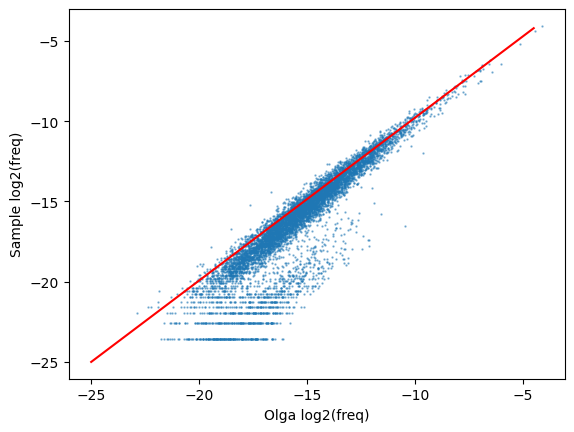

In [21]:
plt.scatter(olga_kmers,
            keck_kmers,
            s = 0.5,
            alpha = 0.5)
plt.plot([-25, -4.5], [-25, -4.2], c = 'r')
plt.xlabel('Olga log2(freq)')
plt.ylabel('Sample log2(freq)')
#plt.plot(np.log2(np.arange(0, 1, 0.01)), np.log2(np.arange(0, 1, 0.01)))

In [22]:
#прочитаем все заново, да, не очень хорошо, но можно запускать код отсюда
# keck_kmers = pd.read_csv('/home/dluppov/Sample_k3mers_counts_mirror_sum.csv', index_col=0)
# olga_kmers = pd.read_csv('/home/dluppov/OLGA_k3mers_counts_mirror_sum.csv', index_col=0)


keck_kmers = pd.read_csv('/home/dluppov/Sample_k3mers_counts.csv', index_col=0)
olga_kmers = pd.read_csv('/home/dluppov/Olga_k3mers_counts.csv', index_col=0)

# keck_kmers = pd.read_csv('./Sample_k2mers_counts.csv', index_col=0)
# olga_kmers = pd.read_csv('./Olga_k2mers_counts.csv', index_col=0)

# hashes_keck = pd.Series(keck_kmers.index).apply(lambda x: palindrome_hash(x))
# hashes_keck.index = keck_kmers.index
# keck_kmers.index.name = 'kmer'
# keck_kmers.insert(0, 'hash', hashes_keck)

# keck_kmers = keck_kmers.reset_index().set_index('hash')

# hashes_olga = pd.Series(olga_kmers.index).apply(lambda x: palindrome_hash(x))
# hashes_olga.index = olga_kmers.index
# olga_kmers.index.name = 'kmer'
# olga_kmers.insert(0, 'hash', hashes_olga)
# olga_kmers = olga_kmers.reset_index().set_index('hash')

common_kmers = list(set(keck_kmers.index).intersection(olga_kmers.index))

olga_kmers = olga_kmers.loc[common_kmers]
keck_kmers = keck_kmers.loc[common_kmers]


keck_kmers = keck_kmers['0']
olga_kmers = olga_kmers['0']

keck_kmers.name = 'keck_freq'
olga_kmers.name = 'olga_freq'

# olga_kmers.index = pd.Series(olga_kmers.index).apply(lambda x: hases_dict[x])
# keck_kmers.index = pd.Series(keck_kmers.index).apply(lambda x: hases_dict[x])

n = keck_kmers.sum()
m = olga_kmers.sum()
ps = olga_kmers/olga_kmers.sum()
mus = ps*n


In [23]:
#выполним хи-квадрат тест
res_dict = {}
for ind in keck_kmers.index:
    res_dict[ind] = scp.chi2_contingency([[keck_kmers[ind], n - keck_kmers[ind]],
                                         [olga_kmers[ind], m - olga_kmers[ind]]])[1]

In [24]:
p_vals = pd.Series(res_dict)
p_vals

HYY    4.729382e-03
YVW    3.600956e-03
NHK    1.096441e-05
YRG    1.926720e-10
MAW    1.350459e-01
           ...     
TTM    8.669110e-01
RMR    4.437653e-15
LNK    4.054001e-11
FLS    4.214357e-01
REC    6.215827e-93
Length: 7852, dtype: float64

In [25]:
p_vals = p_vals.apply(lambda x: 10**(-100) if x < 10**(-100) else x)

In [26]:
log_pvals = np.log10(p_vals)
log_pvals

HYY    -2.325196
YVW    -2.443582
NHK    -4.960015
YRG    -9.715182
MAW    -0.869519
         ...    
TTM    -0.062026
RMR   -14.352847
LNK   -10.392116
FLS    -0.375269
REC   -92.206501
Length: 7852, dtype: float64

In [27]:
keck_kmers = keck_kmers/keck_kmers.sum()
olga_kmers = olga_kmers/olga_kmers.sum()

fold_change_freq = np.log2(keck_kmers/olga_kmers)
fold_change_freq.name = 'log2FC'

keck_kmers = np.log2(keck_kmers[fold_change_freq.index])
olga_kmers = np.log2(olga_kmers[fold_change_freq.index])


summing_df = pd.concat([fold_change_freq, olga_kmers, keck_kmers], axis = 1)
summing_df

log2FC  olga_freq  keck_freq
HYY -0.433367 -16.526882 -16.960249
YVW -0.854867 -18.004855 -18.859722
NHK -2.014943 -18.375294 -20.390237
YRG -0.159172 -11.580811 -11.739983
MAW -0.556912 -18.833325 -19.390237
..        ...        ...        ...
TTM -0.039549 -17.291794 -17.331343
RMR -0.961644 -15.458966 -16.420610
LNK -1.096864 -16.215371 -17.312234
FLS  0.051474 -14.411964 -14.360489
REC -5.604259 -14.785978 -20.390237

[7852 rows x 3 columns]

In [28]:
summing_df_all = pd.concat([summing_df, log_pvals], axis = 1)
summing_df_all.rename(columns = {0: 'log10_p_val'}, inplace = True)
summing_df_all

log2FC  olga_freq  keck_freq  log10_p_val
HYY -0.433367 -16.526882 -16.960249    -2.325196
YVW -0.854867 -18.004855 -18.859722    -2.443582
NHK -2.014943 -18.375294 -20.390237    -4.960015
YRG -0.159172 -11.580811 -11.739983    -9.715182
MAW -0.556912 -18.833325 -19.390237    -0.869519
..        ...        ...        ...          ...
TTM -0.039549 -17.291794 -17.331343    -0.062026
RMR -0.961644 -15.458966 -16.420610   -14.352847
LNK -1.096864 -16.215371 -17.312234   -10.392116
FLS  0.051474 -14.411964 -14.360489    -0.375269
REC -5.604259 -14.785978 -20.390237   -92.206501

[7852 rows x 4 columns]

In [29]:
c_marker = pd.Series(summing_df_all.index).apply(lambda x: True if 'C' in x else False)
c_marker.index = summing_df_all.index
summing_df_all.insert(4, 'c_marker', c_marker)

In [30]:
summing_df_all.to_csv('3mer_tes_data.csv')

In [31]:
import plotly.express as px

fig = px.scatter(summing_df_all, x="olga_freq", y="keck_freq",
                 color="log10_p_val",
                 #color_discrete_sequence=px.colors.qualitative.Antique
                )
fig.update_traces(marker=dict(size=4, opacity = 0.4))

fig.add_scatter(x = [-22, -4.5], y = [-22, -4.2], mode = 'lines')
fig.update_layout(showlegend=False)

fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=100,
        r=100,
       b=60,
        t=60,
        pad=0
    ),
)

fig.show()

In [32]:
summing_df_all_cluster = summing_df_all[summing_df_all.olga_freq - summing_df_all.keck_freq > 2.5]

In [33]:
glyco_marker = pd.Series(summing_df_all.index).apply(lambda x: True if x[0] == 'N' and (x[2] == 'T' or x[2] == 'S') else False)
glyco_marker.index = summing_df_all.index
summing_df_all.insert(5, 'glyco_marker', glyco_marker)

In [34]:
np.where(summing_df_all.c_marker, 'b', np.where(summing_df_all.glyco_marker, 'r', 'grey'))

array(['grey', 'grey', 'grey', ..., 'grey', 'grey', 'b'], dtype='<U4')

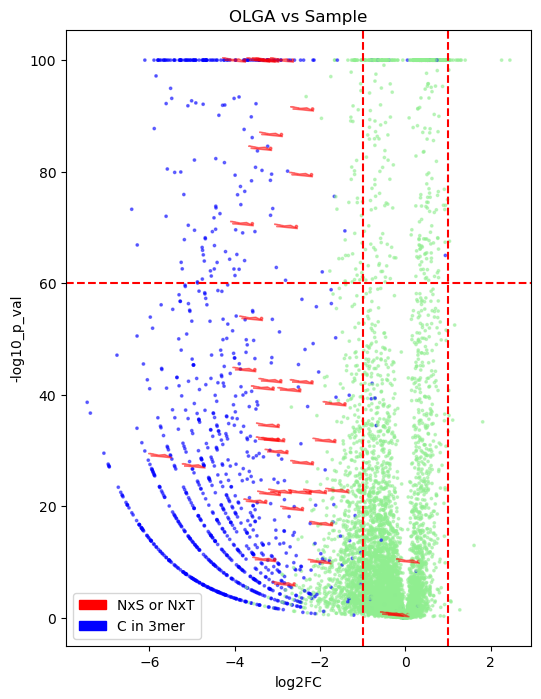

In [35]:
import matplotlib.patches as mpatches

plt.figure(figsize=(6, 8))
#colors = summing_df_all.glyco_marker.apply(lambda x: 'r' if x else 'b')

colors = np.where(summing_df_all.c_marker, 'b', np.where(summing_df_all.glyco_marker, 'r', 'lightgreen'))

plt.scatter(summing_df_all.log2FC, -summing_df_all.log10_p_val, s = 3, c=colors, alpha=0.5)
plt.xlabel('log2FC')
plt.ylabel('-log10_p_val')
plt.axvline(-1, color= 'r', linestyle = '--')
plt.axvline(1, color = 'r', linestyle = '--')
plt.axhline(60, color = 'r', linestyle = '--')

red_patch = mpatches.Patch(color='r', label='NxS or NxT')
blue_patch = mpatches.Patch(color='b', label='C in 3mer')

plt.legend(handles=[red_patch, blue_patch])

plt.title('OLGA vs Sample')

for i in range(len(summing_df_all)):
#     if summing_df_all.iloc[i]['c_marker']:
#         plt.arrow(summing_df_all.iloc[i]['log2FC'], -summing_df_all.iloc[i]['log10_p_val'], 0, 0.5, color='b', width=0.02, head_width=0.1, alpha=0.5)
     if summing_df_all.iloc[i]['glyco_marker']:
        plt.arrow(-0.5+summing_df_all.iloc[i]['log2FC'], 0.415-summing_df_all.iloc[i]['log10_p_val'], 0.2, -0.3, color='r', width=0.05, head_width=0.4, alpha=0.5)

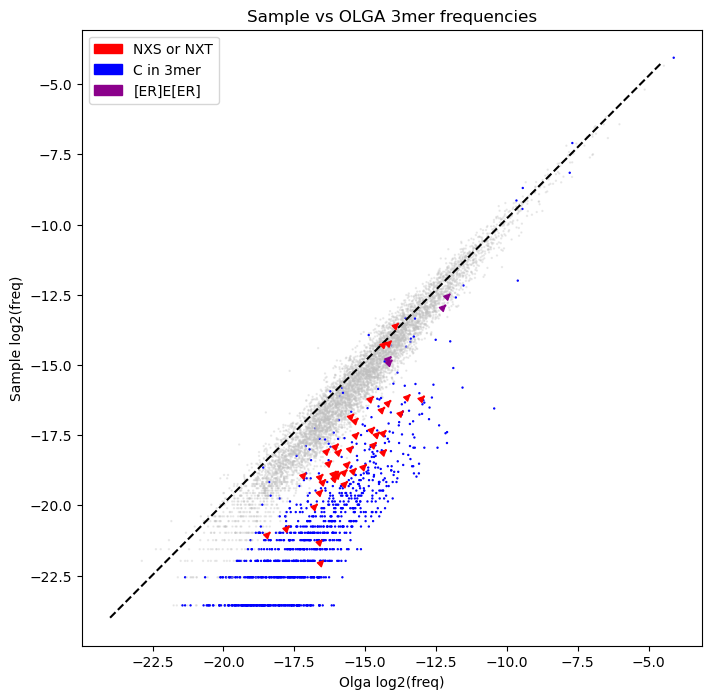

In [38]:
colors = np.where(summing_df_all.c_marker, 'b',
                  np.where(summing_df_all.glyco_marker, 'r',
                           np.where(summing_df_all.er_marker, 'darkmagenta', 'silver')))
alpha = np.where(summing_df_all.c_marker, 1,
                  np.where(summing_df_all.glyco_marker, 1,
                           np.where(summing_df_all.er_marker, 1, 0.3)))


plt.figure(figsize=(8, 8))
plt.scatter(olga_kmers,
            keck_kmers,
            s = 0.5,
            alpha = alpha, c = colors)
plt.plot([-24, -4.5], [-24, -4.2], '--', c = 'black')
plt.xlabel('Olga log2(freq)')
plt.ylabel('Sample log2(freq)')

for i, row in summing_df_all[summing_df_all.glyco_marker == 1].iterrows():
    plt.annotate('', xy=(row['olga_freq'], row['keck_freq']), 
                 xytext=(row['olga_freq']-0.1, row['keck_freq']-0.1),
                 arrowprops=dict(facecolor='red', headwidth=4, headlength=4, edgecolor='red'))
    
for i, row in summing_df_all[summing_df_all.er_marker == 1].iterrows():
    plt.annotate('', xy=(row['olga_freq'], row['keck_freq']), 
                 xytext=(row['olga_freq']-0.1, row['keck_freq']-0.1),
                 arrowprops=dict(facecolor='darkmagenta', headwidth=4, headlength=4, edgecolor='darkmagenta'))
    
plt.title('Sample vs OLGA 3mer frequencies')

red_patch = mpatches.Patch(color='r', label='NXS or NXT')
blue_patch = mpatches.Patch(color='b', label='C in 3mer')
magenta_patch = mpatches.Patch(color='darkmagenta', label='[ER]E[ER]')

plt.legend(handles=[red_patch, blue_patch, magenta_patch])

In [37]:
er_marker = pd.Series(summing_df_all.index).apply(lambda x: True if x[0] in {'E', 'R'} and x[1] == 'E' and x[2] in {'E', 'R'} else False)
er_marker.index = summing_df_all.index

summing_df_all.insert(5, 'er_marker', er_marker)

In [39]:
summing_df_all[summing_df_all.er_marker]

log2FC  olga_freq  keck_freq  log10_p_val  c_marker  er_marker  \
RER -0.469932 -12.015419 -12.485351   -48.159910     False       True   
REE -0.711802 -12.173285 -12.885087   -84.715902     False       True   
EER -0.619520 -14.101438 -14.720958   -18.525491     False       True   
EEE -0.777144 -14.068772 -14.845916   -26.742418     False       True   

     glyco_marker  
RER         False  
REE         False  
EER         False  
EEE         False

In [30]:
import peptides

In [42]:
#напечатаем левый верхний угол
for gene in summing_df_all[summing_df_all.log2FC < -1][summing_df_all.log10_p_val < -60].index:
    if gene[0] == 'N' and (gene[2] == 'T' or gene[2] == 'S'): #напечатать заряд + база ротомеров №N - глизилирование
        print(gene)

NRS
NLT
NSS
NRT
NGT
NNT
NDT
NST
NET
NTS
NGS


/home/dluppov/.conda-envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [55]:
dif_kmers = pd.Series(summing_df_all[summing_df_all.log2FC < -1][summing_df_all.log10_p_val < -60][~summing_df_all.c_marker][~summing_df_all.glyco_marker].index)

/home/dluppov/.conda-envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [56]:
com_kmers = pd.Series(summing_df_all[abs(summing_df_all.log2FC) < 0.5].index)

In [58]:
import peptides

In [59]:
charge_df = pd.concat([com_kmers.apply(lambda x: peptides.Peptide(x).charge()), 
                 dif_kmers.apply(lambda x: peptides.Peptide(x).charge())], axis = 1)

charge_df.rename(columns = {0: 'common', 1: 'neg_selected'}, inplace=True)

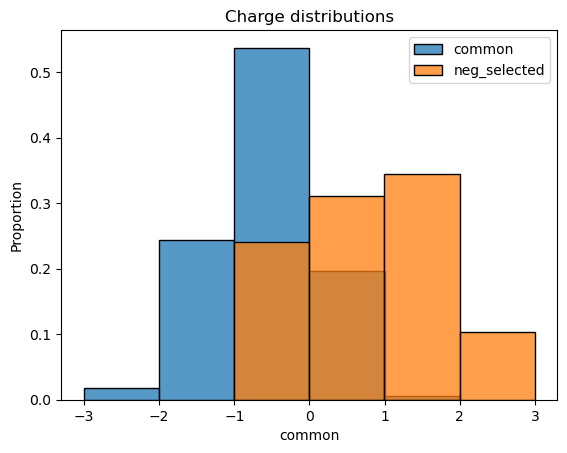

In [63]:
sns.histplot(charge_df.common ,stat = "proportion", binwidth=1, label = 'common')
sns.histplot(charge_df.neg_selected ,stat = "proportion", binwidth=1, label = 'neg_selected')
plt.title('Charge distributions')
plt.legend()
plt.show()

Text(0, 0.5, 'Hydrophobicity')

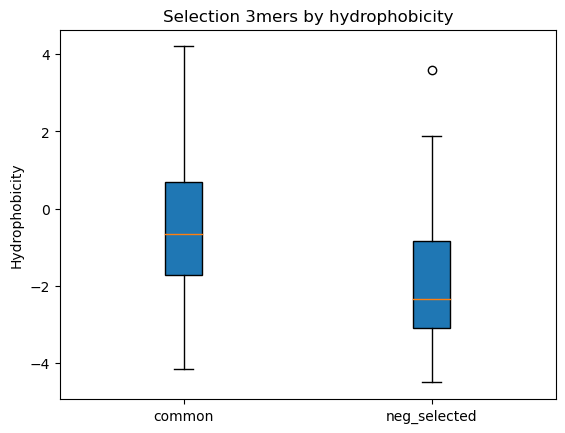

In [107]:
plt.boxplot([charge_df.common, charge_df.neg_selected.dropna()], labels = ['common', 'neg_selected'], patch_artist = True)
plt.title('Selection 3mers by hydrophobicity')
plt.ylabel('Hydrophobicity')

https://weblogo.threeplusone.com/create.cgi

<AxesSubplot:xlabel='cdr3aa', ylabel='Count'>

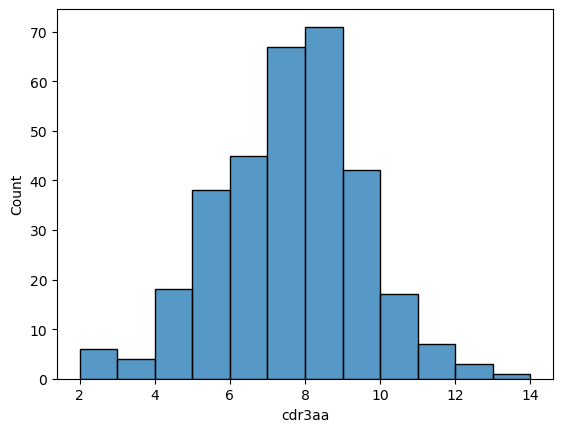

In [236]:
find_res = keck_raw.cdr3aa.apply(lambda x: x.find('VYQ'))
sns.histplot(find_res[find_res != -1], binwidth=1)

In [27]:
for ind in summing_df_all[summing_df_all.c_marker][summing_df_all.log2FC > 0].index:
    print(ind)

CTS
CAI
CSV
CAC
CIS
CAS
CAW
CSA


/home/dluppov/.conda-envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



# Coupled genes

In [28]:
olga_trb = pd.read_csv('/home/dluppov/TRB_10_7.tsv', sep = '\t', header = None)
olga_trb.rename(columns = {0: 'seq', 1: 'aa', 2: 'V_gene', 3: 'J_gene'}, inplace = True)
olga_trb

seq  \
0                  TGTGCCAGCAGCGGTAGGGGGACACTATTGGGCACCTTC   
1                              TGTGGACGGAAGGACGAGCAGTACTTC   
2                     TGCAGTGCTCGGGGCGTCTTCTCTGAAGCTTTCTTT   
3            TGTGCCACCAATGACAGGGGGCGCACCTACAATGAGCAGTTCTTC   
4        TGTGCCAGCAGTTTAGCTGGACTAGCGGGTTGTCGGAAGTTGACGG...   
...                                                    ...   
9999995  TGTGCCAGCAGTTACTCGACCCGCCCGGTGCGGACCGGGGAGCTGT...   
9999996      TGTGCCCCGGAGGGGGAGAGGGGGGGGTCCTACGAGCAGTACTTC   
9999997         TGTGCCAGCAGCCAAGACCCGGGACAGGGTTCGGCTTTCTTT   
9999998   TGCAGTGCTAGAGATCGCCGGGACAGGGGGAACACTGAAGCTTTCTTT   
9999999  TGTGCCAGCTCACCACCCTGCCGGCGCCTTAGCTATCTCACAGATA...   

                            aa    V_gene   J_gene  
0                CASSGRGTLLGTF   TRBV7-9  TRBJ1-2  
1                    CGRKDEQYF  TRBV20-1  TRBJ2-7  
2                 CSARGVFSEAFF  TRBV20-1  TRBJ1-1  
3              CATNDRGRTYNEQFF  TRBV24-1  TRBJ2-1  
4        CASSLAGLAGCRKLTEETQYF    TRBV27  TRBJ2-5  
...                        ...       ...      ...  
9999995      CASSYSTRPVRTGELFF   TRBV6-5  TRBJ2-2  
9999996        CAPEGERGGSYEQYF  TRBV24-1  TRBJ2-7  
9999997         CASSQDPGQGSAFF   TRBV3-1  TRBJ1-1  
9999998       CSARDRRDRGNTEAFF  TRBV20-1  TRBJ1-1  
9999999    CASSPPCRRLSYLTDTQYF    TRBV18  TRBJ2-3  

[10000000 rows x 4 columns]

In [29]:
olga_trb.V_gene = olga_trb.V_gene.apply(lambda x: x.split('-')[0])
olga_trb.J_gene = olga_trb.J_gene.apply(lambda x: x.split('-')[0])

In [30]:
olga_trb.insert(4, 'Joint', olga_trb.V_gene + olga_trb.J_gene)

In [31]:
keck_raw = pd.read_csv('/home/dluppov/tcr-thymic-selection/naive_cells/hip_full/naive_clonotypes_keck.csv.gz')
keck_raw = keck_raw.loc[np.logical_and(keck_raw.cdr3aa.str.startswith('C'),
               np.logical_or(keck_raw.cdr3aa.str.endswith('W'), keck_raw.cdr3aa.str.endswith('F')))]

In [32]:
keck_raw.v = keck_raw.v.apply(lambda x: x.split(',')[0].split('-')[0])
keck_raw.j = keck_raw.j.apply(lambda x: x.split(',')[0].split('-')[0])
keck_raw.insert(3, 'Joint', keck_raw.v + keck_raw.j)

In [33]:
keck_raw_freq = keck_raw.Joint.value_counts()
olga_trb_freq = olga_trb.Joint.value_counts()


In [34]:
keck_raw_freq = keck_raw_freq.loc[olga_trb_freq.index]

In [35]:
keck_raw_norm_freq = keck_raw_freq/keck_raw_freq.sum()
olga_trb__norm_freq = olga_trb_freq/olga_trb_freq.sum()

In [36]:
fc_freq = keck_raw_norm_freq/olga_trb__norm_freq

n = keck_raw_freq.sum()
m = olga_trb_freq.sum()
res_dict = {}
for ind in keck_raw_freq.index:
    res_dict[ind] = scp.chi2_contingency([[keck_raw_freq[ind], n - keck_raw_freq[ind]],
                                         [olga_trb_freq[ind], m - olga_trb_freq[ind]]])[1]

Text(0.5, 1.0, 'OLGA vs Sample')

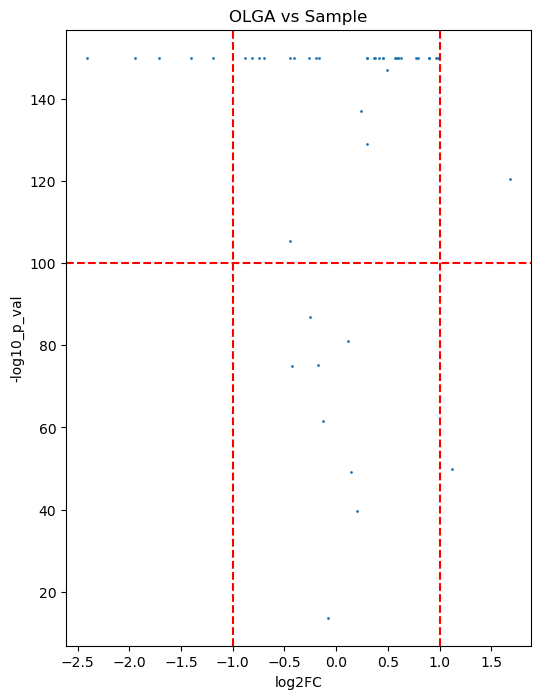

In [37]:
p_vals = pd.Series(res_dict)
p_vals = p_vals.apply(lambda x: 10**(-150) if x < 10**(-150) else x)
log_pvals = np.log10(p_vals)
plt.figure(figsize=(6, 8))
plt.scatter(np.log2(fc_freq), -log_pvals, s = 1)
plt.xlabel('log2FC')
plt.ylabel('-log10_p_val')
plt.axvline(-1, color= 'r', linestyle = '--')
plt.axvline(1, color = 'r', linestyle = '--')
plt.axhline(100, color = 'r', linestyle = '--')
plt.title('OLGA vs Sample')

In [38]:
np.log2(fc_freq)[np.log2(fc_freq) <= -1]

TRBV13TRBJ2   -1.946432
TRBV24TRBJ1   -1.714351
TRBV13TRBJ1   -2.406823
TRBV14TRBJ2   -1.193356
TRBV14TRBJ1   -1.404390
Name: Joint, dtype: float64

In [39]:
gene = 'TRBV13TRBJ1'
keck_raw_cur_gene = keck_raw[keck_raw.Joint == gene]
olga_trb_gene = olga_trb[olga_trb.Joint == gene]

In [42]:
res_keck = keck_raw_cur_gene.cdr3aa.apply(lambda x: np.array(k_mers_list_generatot(x, k=7)))
res_list_kekc = np.concatenate(np.array(res_keck))
kmer_freq_keck = pd.Series(res_list_kekc).value_counts()

res_olga = olga_trb_gene.aa.apply(lambda x: np.array(k_mers_list_generatot(x, k=7)))
res_list_olga = np.concatenate(np.array(res_olga))
kmer_freq_olga = pd.Series(res_list_olga).value_counts()

In [43]:
common_kmers = list(set(kmer_freq_olga.index).intersection(set(kmer_freq_keck.index)))
kmer_freq_keck = kmer_freq_keck[common_kmers]
kmer_freq_olga = kmer_freq_olga[common_kmers]


fold_change_freq = np.log2((kmer_freq_keck/kmer_freq_keck.sum())/(kmer_freq_olga/kmer_freq_olga.sum()))
fold_change_freq.name = 'log2FC'

In [44]:
n = kmer_freq_keck.sum()
m = kmer_freq_olga.sum()
ps = kmer_freq_olga/kmer_freq_olga.sum()
mus = ps*n


res_dict = {}
for ind in kmer_freq_keck.index:
    res_dict[ind] = scp.chi2_contingency([[kmer_freq_keck[ind], n - kmer_freq_keck[ind]],
                                         [kmer_freq_olga[ind], m - kmer_freq_olga[ind]]])[1]
    
p_vals = pd.Series(res_dict)
p_vals = p_vals.apply(lambda x: 10**(-100) if x < 10**(-100) else x)
log_pvals = np.log10(p_vals)



In [45]:
kmer_freq_olga = np.log2(kmer_freq_olga/kmer_freq_olga.sum())
kmer_freq_keck = np.log2(kmer_freq_keck/kmer_freq_keck.sum())


In [46]:
kmer_freq_olga

ASSFGVA   -18.054053
LVSNTEA   -16.054053
DRVGGNT   -18.054053
CASSRRP   -11.732125
SLGGQGG   -15.246698
             ...    
GGGRYGY   -15.469091
RFNTEAF   -14.469091
GESATNE   -16.469091
GQISNQP   -16.469091
CASSRTA   -12.009659
Length: 8738, dtype: float64

In [47]:
kmer_freq_olga.name = 'kmer_freq_olga'
kmer_freq_keck.name = 'kmer_freq_keck'
log_pvals.name = 'log_pvals'

res_df = pd.concat([kmer_freq_olga, kmer_freq_keck, fold_change_freq, log_pvals], axis = 1)

In [48]:
import plotly.express as px

fig = px.scatter(res_df, x="kmer_freq_olga", y="kmer_freq_keck",
                 color="log_pvals")
fig.update_traces(marker=dict(size=4, opacity = 0.4))

fig.add_scatter(x = [-17, -4.5], y = [-17, -4.2], mode = 'lines')

fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=100,
        r=100,
       b=60,
        t=60,
        pad=0
    ),
)

fig.show()

Text(0.5, 1.0, 'OLGA vs Sample')

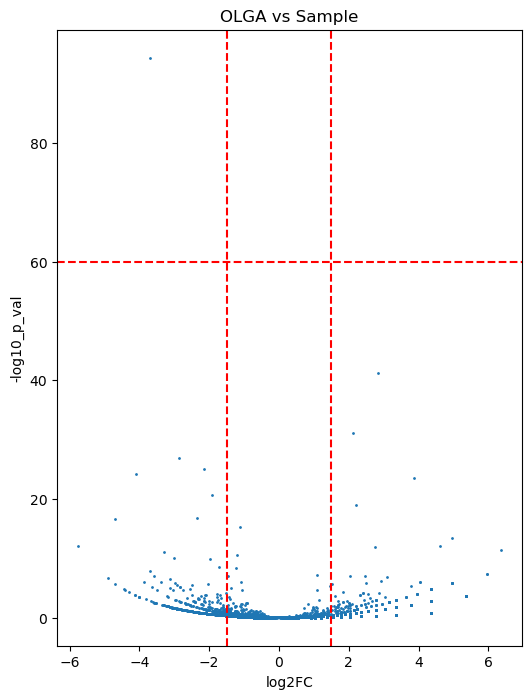

In [49]:
plt.figure(figsize=(6, 8))
#colors = summing_df_all.c_marker.apply(lambda x: 'r' if x else 'b')
plt.scatter(res_df.log2FC, -res_df.log_pvals, s = 1)
plt.xlabel('log2FC')
plt.ylabel('-log10_p_val')
plt.axvline(-1.5, color= 'r', linestyle = '--')
plt.axvline(1.5, color = 'r', linestyle = '--')
plt.axhline(60, color = 'r', linestyle = '--')
plt.title('OLGA vs Sample')

In [ ]:
res_df[res_df.log2FC > 1.5][res_df.log_pvals < -60]

/home/dluppov/.conda-envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Empty DataFrame
Columns: [kmer_freq_olga, kmer_freq_keck, log2FC, log_pvals]
Index: []

In [51]:
res_df[res_df.log2FC < -1.5][res_df.log_pvals < -60]

/home/dluppov/.conda-envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



kmer_freq_olga  kmer_freq_keck    log2FC  log_pvals
SNQPQHF       -4.757137       -8.441415 -3.684278 -94.371623

In [52]:
res_df.sort_values('kmer_freq_olga', ascending=False).head(60)

kmer_freq_olga  kmer_freq_keck    log2FC  log_pvals
SNQPQHF       -4.757137       -8.441415 -3.684278 -94.371623
SGNTIYF       -5.853155       -6.975097 -1.121943 -15.316777
YNSPLHF       -6.170646       -8.331791 -2.161145 -25.015188
TNEKLFF       -6.289182       -8.197490 -1.908308 -20.644824
GNQPQHF       -6.366677       -9.229911 -2.863234 -26.936456
MNTEAFF       -6.520237       -7.712063 -1.191826 -10.582591
YSNQPQH       -6.782007      -10.881988 -4.099981 -24.150835
SYNSPLH       -6.869178       -9.229911 -2.360733 -16.745927
GNTEAFF       -6.918985       -8.134754 -1.215769  -8.341182
LNTEAFF       -7.205430       -8.297025 -1.091595  -6.077548
RNQPQHF       -7.402105      -12.104380 -4.702276 -16.552956
ATNEKLF       -7.453211       -9.441415 -1.988204  -9.843229
RNTEAFF       -7.459729       -9.165781 -1.706052  -8.491138
VNTEAFF       -7.487048       -8.934455 -1.447408  -7.033466
ANYGYTF       -7.545268       -8.601880 -1.056612  -4.701249
GSNQPQH       -7.802571      -11.104380 -3.301810 -11.107051
SSYNSPL       -7.874144      -10.881988 -3.007844 -10.079910
GNYGYTF       -7.920911       -9.297025 -1.376115  -5.036645
DSNQPQH       -7.940311      -13.689343 -5.749032 -12.018572
SSGNTIY       -8.246698       -9.165781 -0.919083  -2.560632
ENTEAFF       -8.304184       -9.229911 -0.925728  -2.494621
GSGNTIY       -8.324432      -10.367415 -2.042982  -5.711626
GNEKLFF       -8.360566       -9.881988 -1.521422  -4.236341
SNYGYTF       -8.365803       -9.297025 -0.931223  -2.420412
GGNQPQH       -8.401208      -12.104380 -3.703172  -7.882335
AGNTIYF       -8.503306       -9.045487 -0.542180  -1.121027
CASSGTG       -8.534417      -12.104380 -3.569963  -7.114517
PNTEAFF       -8.568224       -9.988903 -1.420679  -3.462607
NSNQPQH       -8.576295      -11.689343 -3.113048  -6.482655
CASSPGQ       -8.619425      -11.104380 -2.484955  -5.490449
GNSPLHF       -8.672510      -10.367415 -1.694905  -3.868321
CASSRTG       -8.703114      -11.689343 -2.986229  -5.836753
PNYGYTF       -8.707539       -9.782452 -1.074913  -2.332805
ANTEAFF       -8.716431       -9.689343 -0.972912  -2.063708
CASSPRG       -8.716431      -10.104380 -1.387949  -3.080245
GMNTEAF       -8.720898       -9.782452 -1.061554  -2.280555
GGNTIYF       -8.732125      -10.519418 -1.787293  -3.913972
CASSGQG       -8.738904      -12.104380 -3.365477  -6.064266
TNYGYTF       -8.750272       -9.229911 -0.479639  -0.831361
RSNQPQH       -8.757137      -11.689343 -2.932206  -5.578401
PNQPQHF       -8.801388      -13.689343 -4.887955  -6.613375
CASSPPG       -8.825234      -11.367415 -2.542180  -4.884805
HSNQPQH       -8.834885      -12.689343 -3.854458  -6.032189
CASSPGG       -8.842165      -11.689343 -2.847178  -5.190904
CASSRGG       -8.861760      -11.689343 -2.827583  -5.104801
GDTEAFF       -8.866701      -10.519418 -1.652717  -3.341948
GGNTEAF       -8.904306      -10.689343 -1.785037  -3.506721
KNTEAFF       -8.919627      -10.229911 -1.310284  -2.554938
SNTEAFF       -8.919627       -9.519418 -0.599791  -1.006112
ANEKLFF       -8.932520       -9.601880 -0.669360  -1.147211
GGYGYTF       -8.935112       -9.601880 -0.666768  -1.139917
ANQPQHF       -8.950765      -11.689343 -2.738578  -4.728149
DNQPQHF       -8.974568      -12.104380 -3.129812  -5.023072
GDQPQHF       -8.977238      -11.104380 -2.127143  -3.888426
SNEKLFF       -8.990658       -9.782452 -0.791794  -1.366123
TNTEAFF       -8.996061      -10.104380 -1.108319  -2.027317
VNQPQHF       -9.004205      -11.104380 -2.100176  -3.783717
RGNQPQH       -9.004205      -13.689343 -4.685138  -5.737827
CASSLGG       -9.012394       -7.907983  1.104411  -7.278617
GYSNQPQ       -9.056874      -12.689343 -3.632469  -5.104139

In [162]:
olga_kmers = pd.read_csv('/home/dluppov/Olga_k3mers_counts.csv', index_col=0)
np.log2((olga_kmers/olga_kmers.sum())).head(60)

0
CAS -4.111787
ASS -4.460179
QYF -5.136792
EQY -6.027166
YEQ -6.434812
TQY -6.508237
SSL -6.581745
AFF -6.855586
QFF -6.875947
EQF -6.911500
QHF -6.959708
EAF -6.975345
PQH -6.982060
LFF -6.982208
QPQ -7.071065
GYT -7.071785
YTF -7.073495
NEQ -7.174761
TEA -7.262358
DTQ -7.547727
ETQ -7.646178
CSA -7.689070
ASR -7.693038
NQP -7.699503
YGY -7.717639
SSY -7.767707
CAT -7.781568
SSQ -7.807600
GEL -7.830290
ELF -7.831166
SSP -7.900077
SSG -8.001876
YNE -8.075270
SYE -8.082440
TGE -8.118044
NTE -8.150927
TDT -8.151921
KLF -8.198379
SSS -8.206737
EKL -8.267774
SSR -8.269004
ATS -8.369341
SPL -8.464372
GNT -8.493550
SSE -8.515681
GQG -8.527302
GTG -8.550019
SAR -8.558711
LHF -8.574330
PLH -8.624164
LAG -8.645568
GGG -8.676604
IYF -8.720406
TIY -8.722702
SSF -8.739950
SNQ -8.746165
TSG -8.761058
NTI -8.819116
SSV -8.832300
DRG -8.844750

https://vdjdb.cdr3.net/search

In [65]:
keck_kmers = pd.read_csv('/home/dluppov/Sample_k3mers_counts.csv', index_col=0)

In [66]:
for mer in list(set(olga_kmers.index).difference(set(keck_kmers.index))):
    print(mer)

DQC
WDC
HHC
HTC
YAC
MCC
NCC
NYC
FYC
ICI
CWI
HCI
MQC
CEM
CNK
CFN
QCM
WYC
FTC
CWF
QNC
WPC
WIC
CWY
MCF
YIC
WWC
MCM
MNC
KHC
CEI
CMC
HCH
MTC
IMC
CMF
NCH
MWC
MHM
CWN
CYW
QCC
MCV
CHW
YNC
CWW
MLC
NCK
WNC
CMH
HNC
HCA
QKC
ICF
MHC
MCP
CQC
YTC
VCW
MCA
YMC
TDC
DHC
TCM
WMH
FKC
MYW
TMC
FCH
WQC
MMC
YCI
YCD
CHN
PCW
PCM
MCH
QHC
KCV
TIC
HWC
YCM
FHC
DEC
YDC
NCV
FPC
MHW
HQC
NNC
EHC
MMW
CWM
MCK
MYC
HCD
HCW
NMC
HDC
YCV
HCM
VMC
NEC
KCM
HAC
MRC
WFC
HKC
MPC
KYC
CHK
MCW
HMC
RCM
CND
NCM
CYI
MCN
CHV
ECC
YKC
NDC
WCA
DMC
KQC
FMC
CIC
MVC
CMD
YHC
CYM
KMC
DCV
NVC
MCI
FNC
CDM
CFC
QIC
NWC
YWC
WHC
QMC
CMP
CCQ
NKC
CHC
ICW


# Tasks

TRBV13TRBJ1 - странный

Посмотреть на распределение тримеров по ген-парам и по Vгенам  
Изучить исчезнувшие кмеры  

Убрать больше одного цистеина  

Смотреть альфу

Отнощение каунотов  

Посмотреть на гидрофобность  

Посмотреть длины по отдельности

VYQ	- остается (кусок D и Q) скорее всего фиксированны при такой аллели

Посмотреть на кластер 

Покрасить вулкан на наличие цистеинов  

Почитать статьи, смотреть на 3, 5, 7 Кидеры

# Physical chemistry

In [34]:
import peptides

In [141]:
olga_trb_charge.name = 'charge'

NameError: name 'olga_trb_charge' is not defined

In [131]:
pd.concat([olga_trb, olga_trb_charge], axis = 1).to_csv('/home/dluppov/olga_trb_charge.csv')

NameError: name 'olga_trb_charge' is not defined

In [ ]:
keck_raw = pd.read_csv('/home/dluppov/tcr-thymic-selection/naive_cells/hip_full/naive_clonotypes_keck.csv.gz')
keck_raw = keck_raw.loc[np.logical_and(keck_raw.cdr3aa.str.startswith('C'),
               np.logical_or(keck_raw.cdr3aa.str.endswith('W'), keck_raw.cdr3aa.str.endswith('F')))]
               

In [31]:
keck_raw_charge = keck_raw.cdr3aa.apply(lambda x: peptides.Peptide(x).charge())
keck_raw_charge

3        -1.062215
4         0.935307
5         0.026919
6        -0.972635
7        -1.063916
            ...   
968558    0.935786
968559   -0.065540
968560   -1.066095
968561   -0.063919
968562   -0.064770
Name: cdr3aa, Length: 964889, dtype: float64

In [33]:
keck_raw_charge.name = 'charge'

In [35]:
pd.concat([keck_raw, keck_raw_charge], axis = 1).to_csv('/home/dluppov/keck_charge.csv')

In [74]:
#биноминальное распределение - оценить вероятности 
#попробовать построить дов. интервалы
#Пуассон
#потестить длины и их дисперсии (Kruskal-Wallis)
#физикохимические штуки - смотреть на значисые по FC


In [64]:
keck_charge = pd.read_csv('/home/dluppov/keck_charge.csv')
olga_charge = pd.read_csv('/home/dluppov/olga_trb_charge.csv')

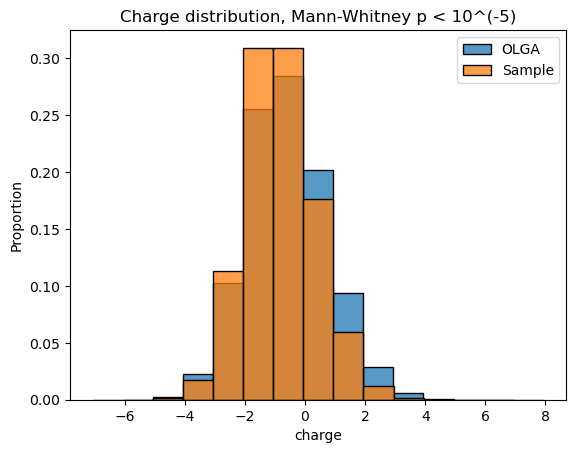

In [67]:
sns.histplot(olga_charge.charge, binwidth= 1 , stat = 'proportion', label = 'OLGA')
sns.histplot(keck_charge.charge, binwidth = 1, stat = "proportion", label = 'Sample')
plt.title('Charge distribution, Mann-Whitney p < 10^(-5)')
plt.legend()
plt.show()

In [51]:
charge_res =scp.mannwhitneyu(olga_charge.charge, keck_charge.charge)
charge_res

MannwhitneyuResult(statistic=4430574966084.5, pvalue=0.0)

In [60]:
keck_hydrophobicity = keck_charge.cdr3aa.apply(lambda x: peptides.Peptide(x).hydrophobicity())
keck_hydrophobicity

0         0.321429
1        -0.430769
2         0.916667
3        -0.130769
4         0.118182
            ...   
964884   -0.616667
964885   -0.966667
964886   -0.376923
964887   -1.183333
964888   -0.454545
Name: cdr3aa, Length: 964889, dtype: float64

In [61]:
pd.concat([keck_charge, keck_hydrophobicity], axis = 1).to_csv('/home/dluppov/keck_charge_hydrophobicity.csv')

In [69]:
olga_trb_hydrophobicity = pd.read_csv('/home/dluppov/olga_trb_charge_hydrophobicity.csv',index_col=0)
keck_hydrophobicity = pd.read_csv('/home/dluppov/keck_charge_hydrophobicity.csv', index_col=0)
#olga_trb_hydrophobicity.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1).to_csv('olga_trb_charge_hydrophobicity.csv')

In [70]:
olga_trb_hydrophobicity.hydrophobicity

AttributeError: 'DataFrame' object has no attribute 'hydrophobicity'

In [71]:
olga_trb_hydrophobicity.rename(columns = {'aa.1': 'hydrophobicity'}, inplace=True)
keck_hydrophobicity.rename(columns = {'cdr3aa.1': 'hydrophobicity'}, inplace=True)

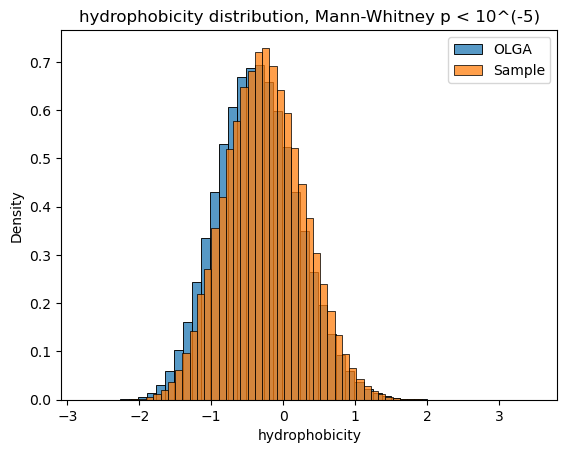

In [72]:
sns.histplot(olga_trb_hydrophobicity.hydrophobicity, bins = 50, stat = 'density', label = 'OLGA')
sns.histplot(keck_hydrophobicity.hydrophobicity, bins = 50, stat = "density", label = 'Sample')
plt.title('hydrophobicity distribution, Mann-Whitney p < 10^(-5)')
plt.legend()
plt.show()

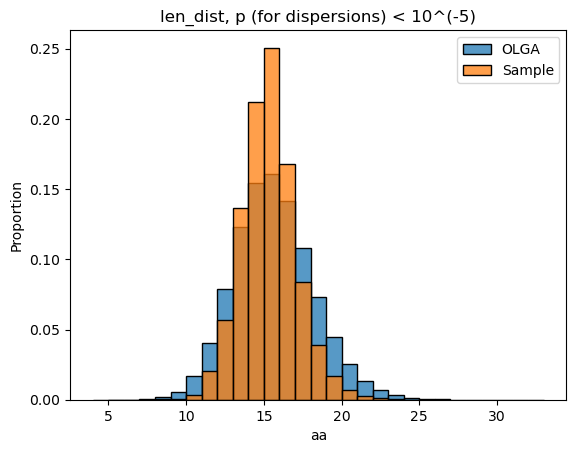

In [43]:
sns.histplot(olga_trb_hydrophobicity.aa.apply(len), binwidth = 1, stat = 'proportion', label = 'OLGA')
sns.histplot(keck_hydrophobicity.cdr3aa.apply(len), binwidth = 1, stat = 'proportion', label = 'Sample')
plt.title('length distribution, p (for dispersions) < 10^(-5)')
plt.legend()
plt.show()

In [41]:
olga_lens = olga_trb_hydrophobicity.aa.apply(len)
keck_kens = keck_hydrophobicity.cdr3aa.apply(len)



In [42]:
res_lens= scp.kruskal(olga_lens, keck_kens)
res_lens

KruskalResult(statistic=10762.210284472058, pvalue=0.0)

In [43]:
olga_lens.std()/keck_kens.std()

1.4376460476808546

In [44]:
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
    dfn = x.size-1 #define degrees of freedom numerator 
    dfd = y.size-1 #define degrees of freedom denominator 
    p = 1-scp.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
    return f, p

In [45]:
f_test(olga_lens, keck_kens)

(2.066826158397984, 1.1102230246251565e-16)

In [46]:
keck_hydrophobicity.v = keck_hydrophobicity.v.apply(lambda x: x.split(',')[0].split('-')[0])
keck_hydrophobicity.v.value_counts()

TRBV6     118116
TRBV7     102485
TRBV5     101034
TRBV20     93946
TRBV4      52028
TRBV19     48921
TRBV28     48134
TRBV12     46489
TRBV9      38427
TRBV27     38422
TRBV2      36173
TRBV30     33064
TRBV11     32260
TRBV3      31136
TRBV10     28299
TRBV29     25283
TRBV18     23168
TRBV24     18398
TRBV15     14827
TRBV25      9247
TRBV14      8722
TRBV13      7406
TRBV21      5313
TRBV23      1990
TRBV16       900
TRBV1        682
TRBV8         10
TRBV22         9
Name: v, dtype: int64

In [47]:
keck_hydrophobicity

cdr3aa       v        j    charge  hydrophobicity
0       CAAAAAGANNEQFF   TRBV2  TRBJ2-1 -1.062215        0.321429
1        CAAAAKRTDTQYF   TRBV7  TRBJ2-3  0.935307       -0.430769
2         CAAAALNSPLHF   TRBV6  TRBJ1-6  0.026919        0.916667
3        CAAAAMSDQPQHF  TRBV18  TRBJ1-5 -0.972635       -0.130769
4          CAAAAPYEQYF  TRBV28  TRBJ2-7 -1.063916        0.118182
...                ...     ...      ...       ...             ...
964884    CYKLSGGREGYF  TRBV20  TRBJ2-7  0.935786       -0.616667
964885    CYPGQFKDTQYF  TRBV20  TRBJ2-3 -0.065540       -0.966667
964886   CYPSDATGYGYTF  TRBV20  TRBJ1-2 -1.066095       -0.376923
964887    CYRGGGQETQYF  TRBV20  TRBJ2-5 -0.063919       -1.183333
964888     CYVRWAYEQYF   TRBV9  TRBJ2-7 -0.064770       -0.454545

[964889 rows x 5 columns]

In [48]:
olga_trb_hydrophobicity.V_gene = olga_trb_hydrophobicity.V_gene.apply(lambda x: x.split('-')[0])
olga_trb_hydrophobicity.V_gene.value_counts()

TRBV6     1451585
TRBV7     1297763
TRBV5     1044209
TRBV20     710824
TRBV10     516925
TRBV27     485213
TRBV24     422639
TRBV12     419593
TRBV11     418541
TRBV9      389045
TRBV4      379600
TRBV19     344630
TRBV13     338216
TRBV28     290805
TRBV3      230358
TRBV14     221414
TRBV29     221113
TRBV30     218457
TRBV2      199045
TRBV18     153267
TRBV25     131160
TRBV15     112007
TRBV16       3591
Name: V_gene, dtype: int64

In [100]:
gene= 'TRBV13'
olga_gene = olga_trb_hydrophobicity[olga_trb_hydrophobicity.V_gene == gene]
keck_gene = keck_hydrophobicity[keck_hydrophobicity.v == gene]

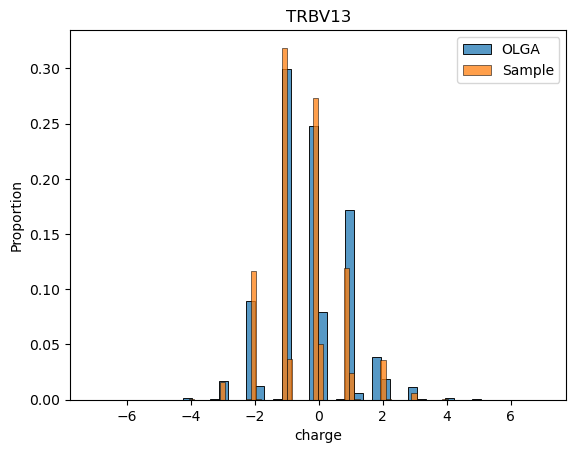

In [101]:
sns.histplot(olga_gene.charge, bins = 50, stat = 'proportion', label = 'OLGA')
sns.histplot(keck_gene.charge, bins = 50, stat = "proportion", label = 'Sample')
plt.title(gene)
plt.legend()
plt.show()

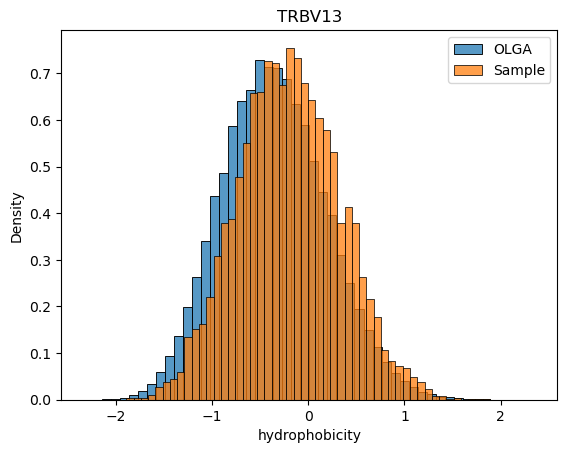

In [66]:
sns.histplot(olga_gene.hydrophobicity, bins = 50, stat = 'density', label = 'OLGA')
sns.histplot(keck_gene.hydrophobicity, bins = 50, stat = "density", label = 'Sample')
plt.title(gene)
plt.legend()
plt.show()

In [61]:
#weblogо  посмотреть
#тримеры
#kedera
#посмотреть на пары, а не на гены
#статтесты 
#посмотреть позиции тримеров
#погуглить про зараяд

# Genes pairs analysis

In [142]:
olga_trb_hydrophobicity = pd.read_csv('/home/dluppov/olga_trb_charge_hydrophobicity.csv',index_col=0)
keck_hydrophobicity = pd.read_csv('/home/dluppov/keck_charge_hydrophobicity.csv', index_col=0)

In [143]:
olga_trb_hydrophobicity.rename(columns = {'aa.1': 'hydrophobicity'}, inplace=True)
keck_hydrophobicity.rename(columns = {'cdr3aa.1': 'hydrophobicity'}, inplace=True)

In [144]:
olga_trb_hydrophobicity.V_gene = olga_trb_hydrophobicity.V_gene.apply(lambda x: x.split('-')[0])
olga_trb_hydrophobicity.J_gene = olga_trb_hydrophobicity.J_gene.apply(lambda x: x.split('-')[0])
olga_trb_hydrophobicity.insert(4, 'Joint', olga_trb_hydrophobicity.V_gene + olga_trb_hydrophobicity.J_gene)

In [145]:
keck_hydrophobicity = keck_hydrophobicity.loc[np.logical_and(keck_hydrophobicity.cdr3aa.str.startswith('C'),
               np.logical_or(keck_hydrophobicity.cdr3aa.str.endswith('W'),
                             keck_hydrophobicity.cdr3aa.str.endswith('F')))]

keck_hydrophobicity.v = keck_hydrophobicity.v.apply(lambda x: x.split(',')[0].split('-')[0])
keck_hydrophobicity.j = keck_hydrophobicity.j.apply(lambda x: x.split(',')[0].split('-')[0])
keck_hydrophobicity.insert(3, 'Joint', keck_hydrophobicity.v + keck_hydrophobicity.j)

In [146]:
olga_trb_hydrophobicity

seq  \
0                  TGTGCCAGCAGCGGTAGGGGGACACTATTGGGCACCTTC   
1                              TGTGGACGGAAGGACGAGCAGTACTTC   
2                     TGCAGTGCTCGGGGCGTCTTCTCTGAAGCTTTCTTT   
3            TGTGCCACCAATGACAGGGGGCGCACCTACAATGAGCAGTTCTTC   
4        TGTGCCAGCAGTTTAGCTGGACTAGCGGGTTGTCGGAAGTTGACGG...   
...                                                    ...   
9999995  TGTGCCAGCAGTTACTCGACCCGCCCGGTGCGGACCGGGGAGCTGT...   
9999996      TGTGCCCCGGAGGGGGAGAGGGGGGGGTCCTACGAGCAGTACTTC   
9999997         TGTGCCAGCAGCCAAGACCCGGGACAGGGTTCGGCTTTCTTT   
9999998   TGCAGTGCTAGAGATCGCCGGGACAGGGGGAACACTGAAGCTTTCTTT   
9999999  TGTGCCAGCTCACCACCCTGCCGGCGCCTTAGCTATCTCACAGATA...   

                            aa  V_gene J_gene        Joint    charge  \
0                CASSGRGTLLGTF   TRBV7  TRBJ1   TRBV7TRBJ1  0.936006   
1                    CGRKDEQYF  TRBV20  TRBJ2  TRBV20TRBJ2 -0.062918   
2                 CSARGVFSEAFF  TRBV20  TRBJ1  TRBV20TRBJ1 -0.062219   
3              CATNDRGRTYNEQFF  TRBV24  TRBJ2  TRBV24TRBJ2 -0.062626   
4        CASSLAGLAGCRKLTEETQYF  TRBV27  TRBJ2  TRBV27TRBJ2 -0.123564   
...                        ...     ...    ...          ...       ...   
9999995      CASSYSTRPVRTGELFF   TRBV6  TRBJ2   TRBV6TRBJ2  0.936928   
9999996        CAPEGERGGSYEQYF  TRBV24  TRBJ2  TRBV24TRBJ2 -2.060369   
9999997         CASSQDPGQGSAFF   TRBV3  TRBJ1   TRBV3TRBJ1 -1.063544   
9999998       CSARDRRDRGNTEAFF  TRBV20  TRBJ1  TRBV20TRBJ1  0.938664   
9999999    CASSPPCRRLSYLTDTQYF  TRBV18  TRBJ2  TRBV18TRBJ2  0.872774   

         hydrophobicity  
0              0.461538  
1             -1.700000  
2              0.725000  
3             -1.313333  
4              0.028571  
...                 ...  
9999995       -0.100000  
9999996       -1.173333  
9999997       -0.257143  
9999998       -1.387500  
9999999       -0.442105  

[10000000 rows x 7 columns]

In [227]:
gene= 'TRBV13TRBJ1'
olga_gene = olga_trb_hydrophobicity[olga_trb_hydrophobicity.Joint == gene]
keck_gene = keck_hydrophobicity[keck_hydrophobicity.Joint == gene]

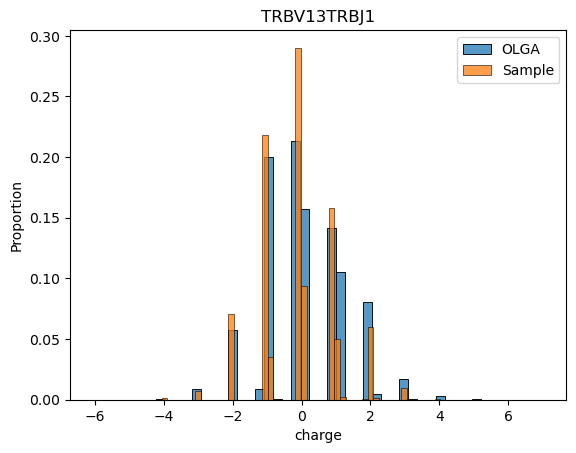

In [228]:
sns.histplot(olga_gene.charge, bins = 50, stat = 'proportion', label = 'OLGA')
sns.histplot(keck_gene.charge, bins = 50, stat = "proportion", label = 'Sample')
plt.title(gene)
plt.legend()
plt.show()

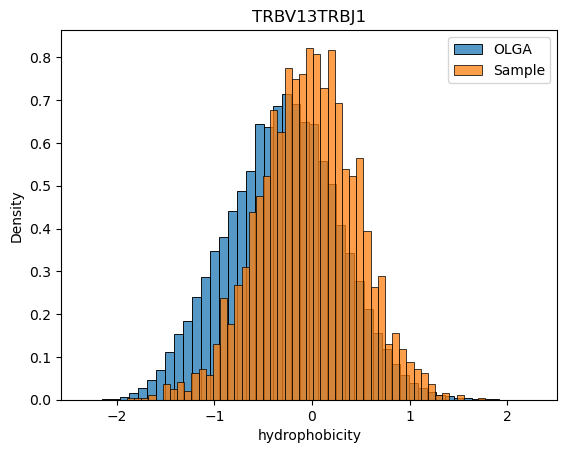

In [229]:
sns.histplot(olga_gene.hydrophobicity, bins = 50, stat = 'density', label = 'OLGA')
sns.histplot(keck_gene.hydrophobicity, bins = 50, stat = "density", label = 'Sample')
plt.title(gene)
plt.legend()
plt.show()

In [230]:
olga_gene_kidera = olga_gene.aa.apply(lambda x: peptides.Peptide(x).kidera_factors())
olga_gene_kidera

67         (-0.12272727272727274, -0.18545454545454554, -...
78         (-0.08142857142857145, -0.6092857142857142, 0....
120        (-0.0005882352941176623, -0.2735294117647059, ...
144        (0.36764705882352944, -0.49235294117647044, 0....
218        (0.4505263157894735, -0.3026315789473684, 0.00...
                                 ...                        
9999172    (0.4728571428571428, -0.775, -0.27857142857142...
9999390    (-0.19636363636363638, -0.0027272727272727904,...
9999615    (-0.10266666666666664, -0.47866666666666663, -...
9999919    (0.18785714285714275, -0.6014285714285713, -0....
9999951    (0.16062500000000002, -0.5800000000000001, 0.0...
Name: aa, Length: 146087, dtype: object

In [231]:
keck_gene_kidera = keck_gene.cdr3aa.apply(lambda x: peptides.Peptide(x).kidera_factors())
keck_gene_kidera

678       (0.01416666666666664, -0.4383333333333333, 0.1...
3153      (0.7114285714285714, -0.5185714285714285, 0.06...
4019      (-0.1457142857142857, -0.7085714285714284, 0.0...
4152      (0.4876923076923077, -0.406923076923077, 0.001...
4228      (0.14999999999999997, -0.35076923076923067, -0...
                                ...                        
779479    (-0.25785714285714284, -0.2028571428571428, -0...
810501    (0.3138461538461538, -0.4238461538461538, 0.11...
811773    (0.6941666666666665, -0.5775000000000001, 0.20...
813717    (-0.17357142857142854, -0.6092857142857142, 0....
964673    (-0.1507692307692308, -0.3753846153846153, -0....
Name: cdr3aa, Length: 2636, dtype: object

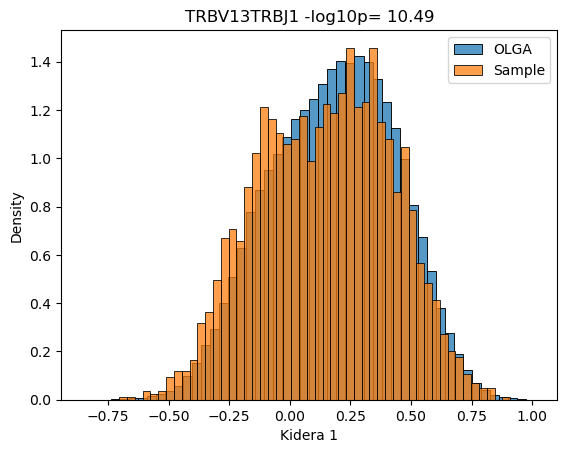

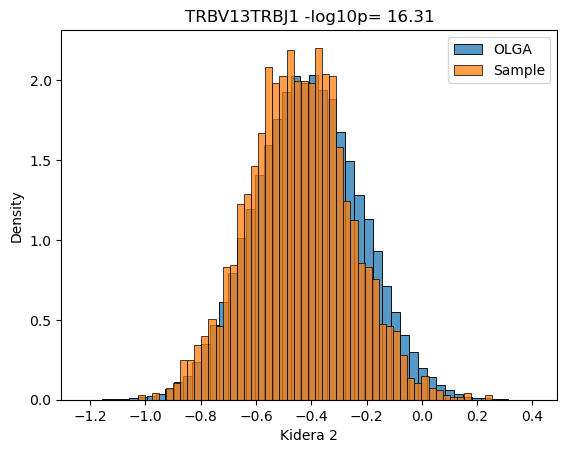

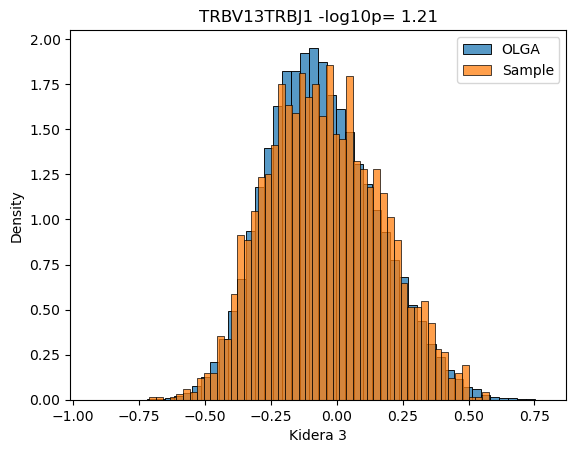

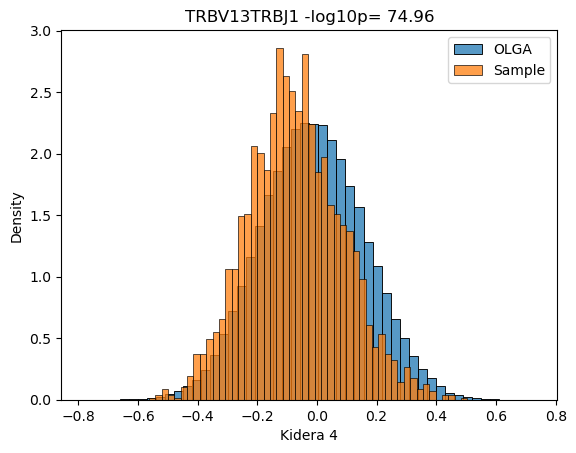

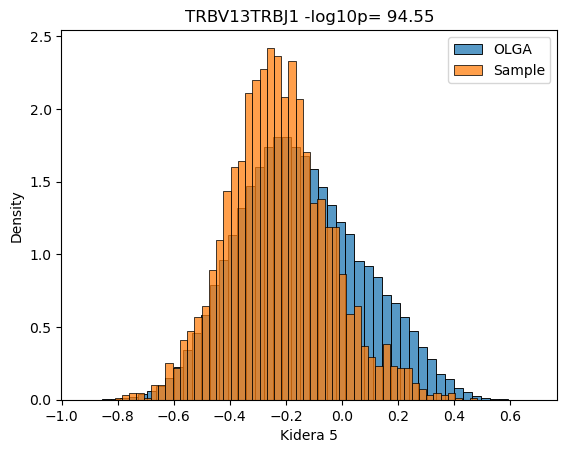

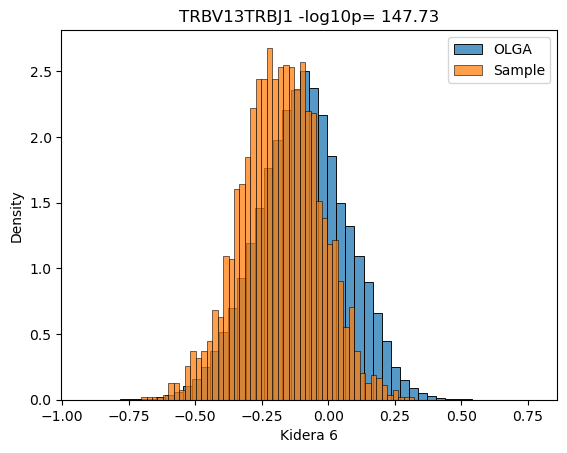

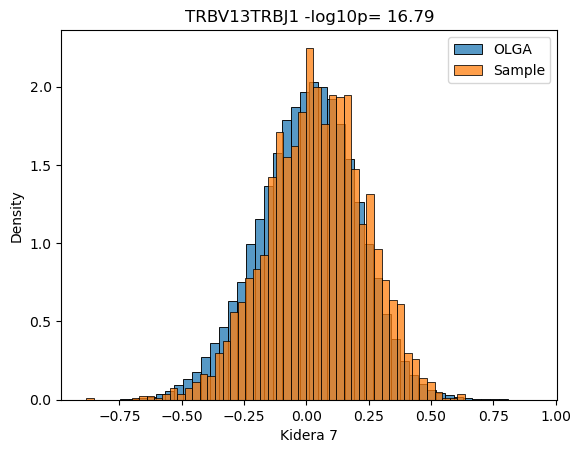

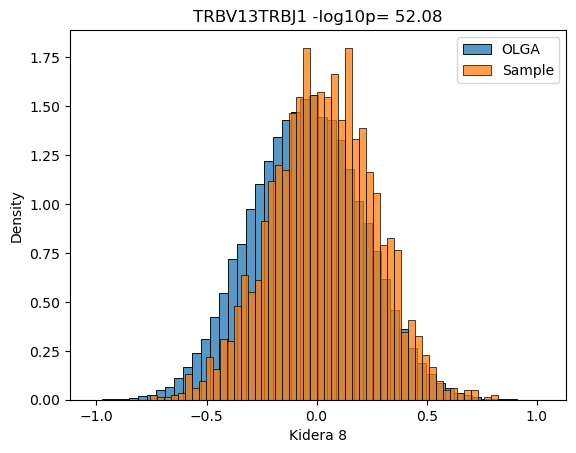

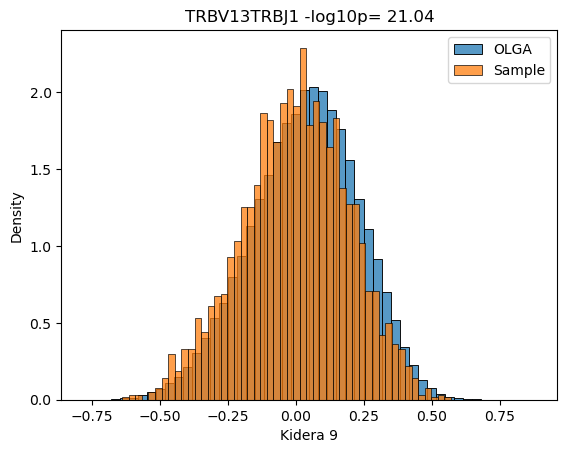

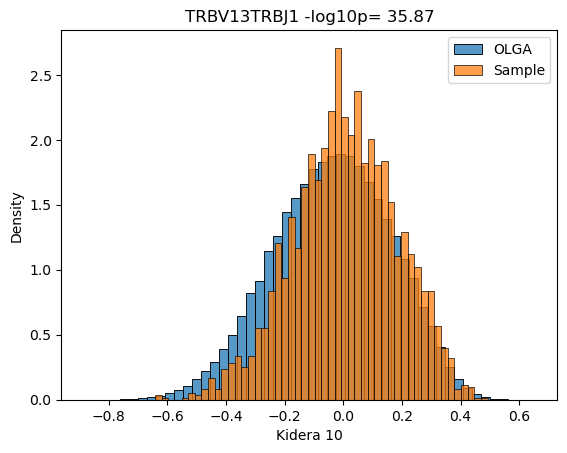

In [232]:

for i in range(10):
    
    sns.histplot(olga_gene_kidera.apply(lambda x: x[i]), bins = 50, stat = 'density', label = 'OLGA')
    sns.histplot(keck_gene_kidera.apply(lambda x: x[i]), bins = 50, stat = "density", label = 'Sample')
    plt.title(gene + f' -log10p= {-np.log10(scp.stats.ttest_ind(olga_gene_kidera.apply(lambda x: x[i]), keck_gene_kidera.apply(lambda x: x[i]), equal_var = False).pvalue):.2f}')
    plt.xlabel(f'Kidera {i+1}')
    plt.legend()
    plt.show()

In [244]:
keck_raw[keck_raw.cdr3aa.apply(lambda x: "VYQ" in x)]

cdr3aa       v      j        Joint
372         CAAGRQGVYQPQHF  TRBV27  TRBJ1  TRBV27TRBJ1
2776       CAFRIRDRVYQPQHF  TRBV30  TRBJ1  TRBV30TRBJ1
23237      CALGPLAVYQETQYF   TRBV2  TRBJ2   TRBV2TRBJ2
25204         CARAVYQETQYF  TRBV30  TRBJ2  TRBV30TRBJ2
29821       CASALHGVYQPQHF  TRBV19  TRBJ1  TRBV19TRBJ1
...                    ...     ...    ...          ...
966872       CSVYQGDRETQYF  TRBV29  TRBJ2  TRBV29TRBJ2
966873        CSVYQGSYEQYF  TRBV29  TRBJ2  TRBV29TRBJ2
966874     CSVYQIAENTGELFF  TRBV29  TRBJ2  TRBV29TRBJ2
966875  CSVYQIAGTGGSYNEQFF  TRBV29  TRBJ2  TRBV29TRBJ2
966876       CSVYQVEKYEQYF  TRBV29  TRBJ2  TRBV29TRBJ2

[319 rows x 4 columns]